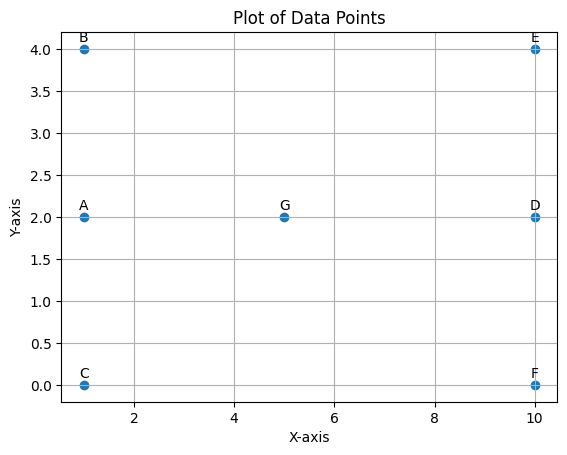

In [ ]:
# plot the data points using matplotlib

import matplotlib.pyplot as plt
# Define the data points
points = {  
    'A': (1, 2),
    'B': (1, 4),
    'C': (1, 0),
    'D': (10, 2),
    'E': (10, 4),
    'F': (10, 0),
    'G': (5, 2)
}

# Extract x and y coordinates
x_coords = [point[0] for point in points.values()]
y_coords = [point[1] for point in points.values()]

# Plot the points
plt.scatter(x_coords, y_coords)

# Annotate the points with their labels
for label, (x, y) in points.items():
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Data Points')
plt.grid(True)
plt.show()

In [2]:
#1. Initialize Choose K cluster centers (centroids) randomly or using K-Means++ 

centroids = {
    'Centroid 1': (1, 0),
    'Centroid 2': (10, 2)
}

In [7]:
#2. Assignment Assign each data point to the nearest centroid 
def euclidean_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5


def assign_clusters(points, centroids):
    clusters = {key: [] for key in centroids.keys()}
    for label, point in points.items():
        print(f"Assigning point {label} at {point}")
        # 1) compute distance to each centroid and store in a dict
        distances = {}
        for c in centroids.keys():
            distances[c] = euclidean_distance(point, centroids[c])
            print(f"  Distance to {c} at {centroids[c]}: {distances[c]:.2f}")
        # 2) pick the centroid with the smallest distance
        closest_centroid = min(distances, key=distances.get)
        # 3) assign the point to that centroid's cluster
        clusters[closest_centroid].append(label)
    return clusters

clusters = assign_clusters(points, centroids)
print("Cluster Assignments:")
for centroid, cluster_points in clusters.items():
    print(f"{centroid}: {cluster_points}")  

Assigning point A at (1, 2)
  Distance to Centroid 1 at (1, 0): 2.00
  Distance to Centroid 2 at (10, 2): 9.00
Assigning point B at (1, 4)
  Distance to Centroid 1 at (1, 0): 4.00
  Distance to Centroid 2 at (10, 2): 9.22
Assigning point C at (1, 0)
  Distance to Centroid 1 at (1, 0): 0.00
  Distance to Centroid 2 at (10, 2): 9.22
Assigning point D at (10, 2)
  Distance to Centroid 1 at (1, 0): 9.22
  Distance to Centroid 2 at (10, 2): 0.00
Assigning point E at (10, 4)
  Distance to Centroid 1 at (1, 0): 9.85
  Distance to Centroid 2 at (10, 2): 2.00
Assigning point F at (10, 0)
  Distance to Centroid 1 at (1, 0): 9.00
  Distance to Centroid 2 at (10, 2): 2.00
Assigning point G at (5, 2)
  Distance to Centroid 1 at (1, 0): 4.47
  Distance to Centroid 2 at (10, 2): 5.00
Cluster Assignments:
Centroid 1: ['A', 'B', 'C', 'G']
Centroid 2: ['D', 'E', 'F']


In [9]:
#3. Update Recalculate centroids as the mean of all assigned points 
def update_centroids(points, clusters):
    new_centroids = {}
    for centroid, cluster_points in clusters.items():
        if cluster_points:  # Avoid division by zero
            x_mean = sum(points[label][0] for label in cluster_points) / len(cluster_points)
            y_mean = sum(points[label][1] for label in cluster_points) / len(cluster_points)
            new_centroids[centroid] = (x_mean, y_mean)
        else:
            new_centroids[centroid] = centroids[centroid]  # Keep the old centroid if no points assigned
    return new_centroids
new_centroids = update_centroids(points, clusters)
print("Updated Centroids:")
for centroid, coords in new_centroids.items():
    print(f"{centroid}: {coords}") 

Updated Centroids:
Centroid 1: (2.0, 2.0)
Centroid 2: (10.0, 2.0)


In [11]:
#4. Repeat Repeat steps 2–3 until centroids do not change (convergence)
clusters = assign_clusters(points, new_centroids)
print("Cluster Assignments:")
for new_centroids, cluster_points in clusters.items():
    print(f"{centroid}: {cluster_points}")  

Assigning point A at (1, 2)
  Distance to Centroid 1 at (2.0, 2.0): 1.00
  Distance to Centroid 2 at (10.0, 2.0): 9.00
Assigning point B at (1, 4)
  Distance to Centroid 1 at (2.0, 2.0): 2.24
  Distance to Centroid 2 at (10.0, 2.0): 9.22
Assigning point C at (1, 0)
  Distance to Centroid 1 at (2.0, 2.0): 2.24
  Distance to Centroid 2 at (10.0, 2.0): 9.22
Assigning point D at (10, 2)
  Distance to Centroid 1 at (2.0, 2.0): 8.00
  Distance to Centroid 2 at (10.0, 2.0): 0.00
Assigning point E at (10, 4)
  Distance to Centroid 1 at (2.0, 2.0): 8.25
  Distance to Centroid 2 at (10.0, 2.0): 2.00
Assigning point F at (10, 0)
  Distance to Centroid 1 at (2.0, 2.0): 8.25
  Distance to Centroid 2 at (10.0, 2.0): 2.00
Assigning point G at (5, 2)
  Distance to Centroid 1 at (2.0, 2.0): 3.00
  Distance to Centroid 2 at (10.0, 2.0): 5.00
Cluster Assignments:
Centroid 2: ['A', 'B', 'C', 'G']
Centroid 2: ['D', 'E', 'F']


In [12]:
 

#4. Repeat Repeat steps 2–3 until centroids do not change (convergence)
def kmeans(points, initial_centroids, max_iterations=2):
    centroids = initial_centroids
    for iteration in range(max_iterations):
        print(f"\nIteration {iteration + 1}")
        clusters = assign_clusters(points, centroids)
        new_centroids = update_centroids(points, clusters)
        
        # Check for convergence (if centroids do not change)
        if new_centroids == centroids:
            print("Convergence reached.")
            break
        centroids = new_centroids
    return centroids, clusters  
final_centroids, final_clusters = kmeans(points, centroids)
print("\nFinal Centroids:")
for centroid, coords in final_centroids.items():
    print(f"{centroid}: {coords}")


Iteration 1
Assigning point A at (1, 2)
  Distance to Centroid 1 at (1, 0): 2.00
  Distance to Centroid 2 at (10, 2): 9.00
Assigning point B at (1, 4)
  Distance to Centroid 1 at (1, 0): 4.00
  Distance to Centroid 2 at (10, 2): 9.22
Assigning point C at (1, 0)
  Distance to Centroid 1 at (1, 0): 0.00
  Distance to Centroid 2 at (10, 2): 9.22
Assigning point D at (10, 2)
  Distance to Centroid 1 at (1, 0): 9.22
  Distance to Centroid 2 at (10, 2): 0.00
Assigning point E at (10, 4)
  Distance to Centroid 1 at (1, 0): 9.85
  Distance to Centroid 2 at (10, 2): 2.00
Assigning point F at (10, 0)
  Distance to Centroid 1 at (1, 0): 9.00
  Distance to Centroid 2 at (10, 2): 2.00
Assigning point G at (5, 2)
  Distance to Centroid 1 at (1, 0): 4.47
  Distance to Centroid 2 at (10, 2): 5.00

Iteration 2
Assigning point A at (1, 2)
  Distance to Centroid 1 at (2.0, 2.0): 1.00
  Distance to Centroid 2 at (10.0, 2.0): 9.00
Assigning point B at (1, 4)
  Distance to Centroid 1 at (2.0, 2.0): 2.24
  

In [ ]:
#4. Repeat Repeat steps 2–3 until centroids do not change (convergence)